## Exercise 3. GLMs, Logistic Regression

1. Convince yourself, that, if we encode the binary outcome as $Y \in {\pm 1}$, the (conditional) log-likelihood under the logistic regression model simplifies to:

$L(w) := \log P(Y \mid X, w) = \sum_i \log \sigma(y_i \Phi(x_i)^T w)$

2. Convince yourself, that $\sigma'(x) = \sigma(x) (1 - \sigma(x))$ for the logistic function. What is $\nabla_w L(w)$?
3. Fit a binary logistic regression model to the problem of distinguishing 4s vs 7s in the MNIST dataset.
4. Plot some samples in the training set, where the model made a mistake

In [2]:
import sklearn
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True) 
X /= 255.0 # scale to 0-1 range
y = sklearn.preprocessing.LabelEncoder().fit_transform(y)

In [11]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression

In [7]:
class_0 = 4
class_1 = 7
idx_ = np.logical_or((y == class_0), (y == class_1))

X_= X[idx_,:]
y_= y[idx_].astype(np.float64)
y_[y_ == class_0] = 0.0
y_[y_ == class_1] = 1.0
X_train, X_test, y_train, y_test = train_test_split(X_,y_, random_state=77)

In [13]:
params = {'penalty':'l2','C':1,'tol':1e-4,'fit_intercept':True,'max_iter':2000,'verbose':True}
cls = LogisticRegression(**params)
cls.fit(X_train, y_train)
print(f'Scikit score train: {cls.score(X_train,y_train)}, test: {cls.score(X_test,y_test)}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Scikit score train: 0.9956550486445641, test: 0.9898016997167138


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished


In [14]:
w = cls.coef_

In [20]:
import matplotlib.pyplot as plt

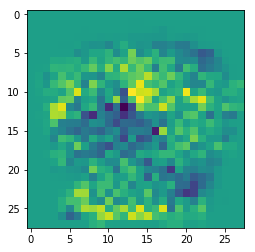

In [21]:
plt.imshow(w.reshape((28,28)))

In [19]:
28*28

784